In [1]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving preprocessed_data.csv to preprocessed_data (1).csv


In [3]:
import pandas as pd

# Load the files
original_df = pd.read_csv('diabetes.csv')            # Has 'Outcome'
preprocessed_df = pd.read_csv('preprocessed_data.csv')  # Missing 'Outcome'

# Check if row counts match
if len(original_df) == len(preprocessed_df):
    # Add Outcome column
    preprocessed_df['Outcome'] = original_df['Outcome']

    # Save final file
    preprocessed_df.to_csv('preprocessed_data_with_outcome.csv', index=False)
    print("✅ 'Outcome' column successfully added and saved!")
else:
    print("❌ Row count mismatch! Check your files.")


✅ 'Outcome' column successfully added and saved!


In [4]:
files.download('preprocessed_data_with_outcome.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       151
           1       0.57      0.59      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231

Confusion Matrix:
[[115  36]
 [ 33  47]]


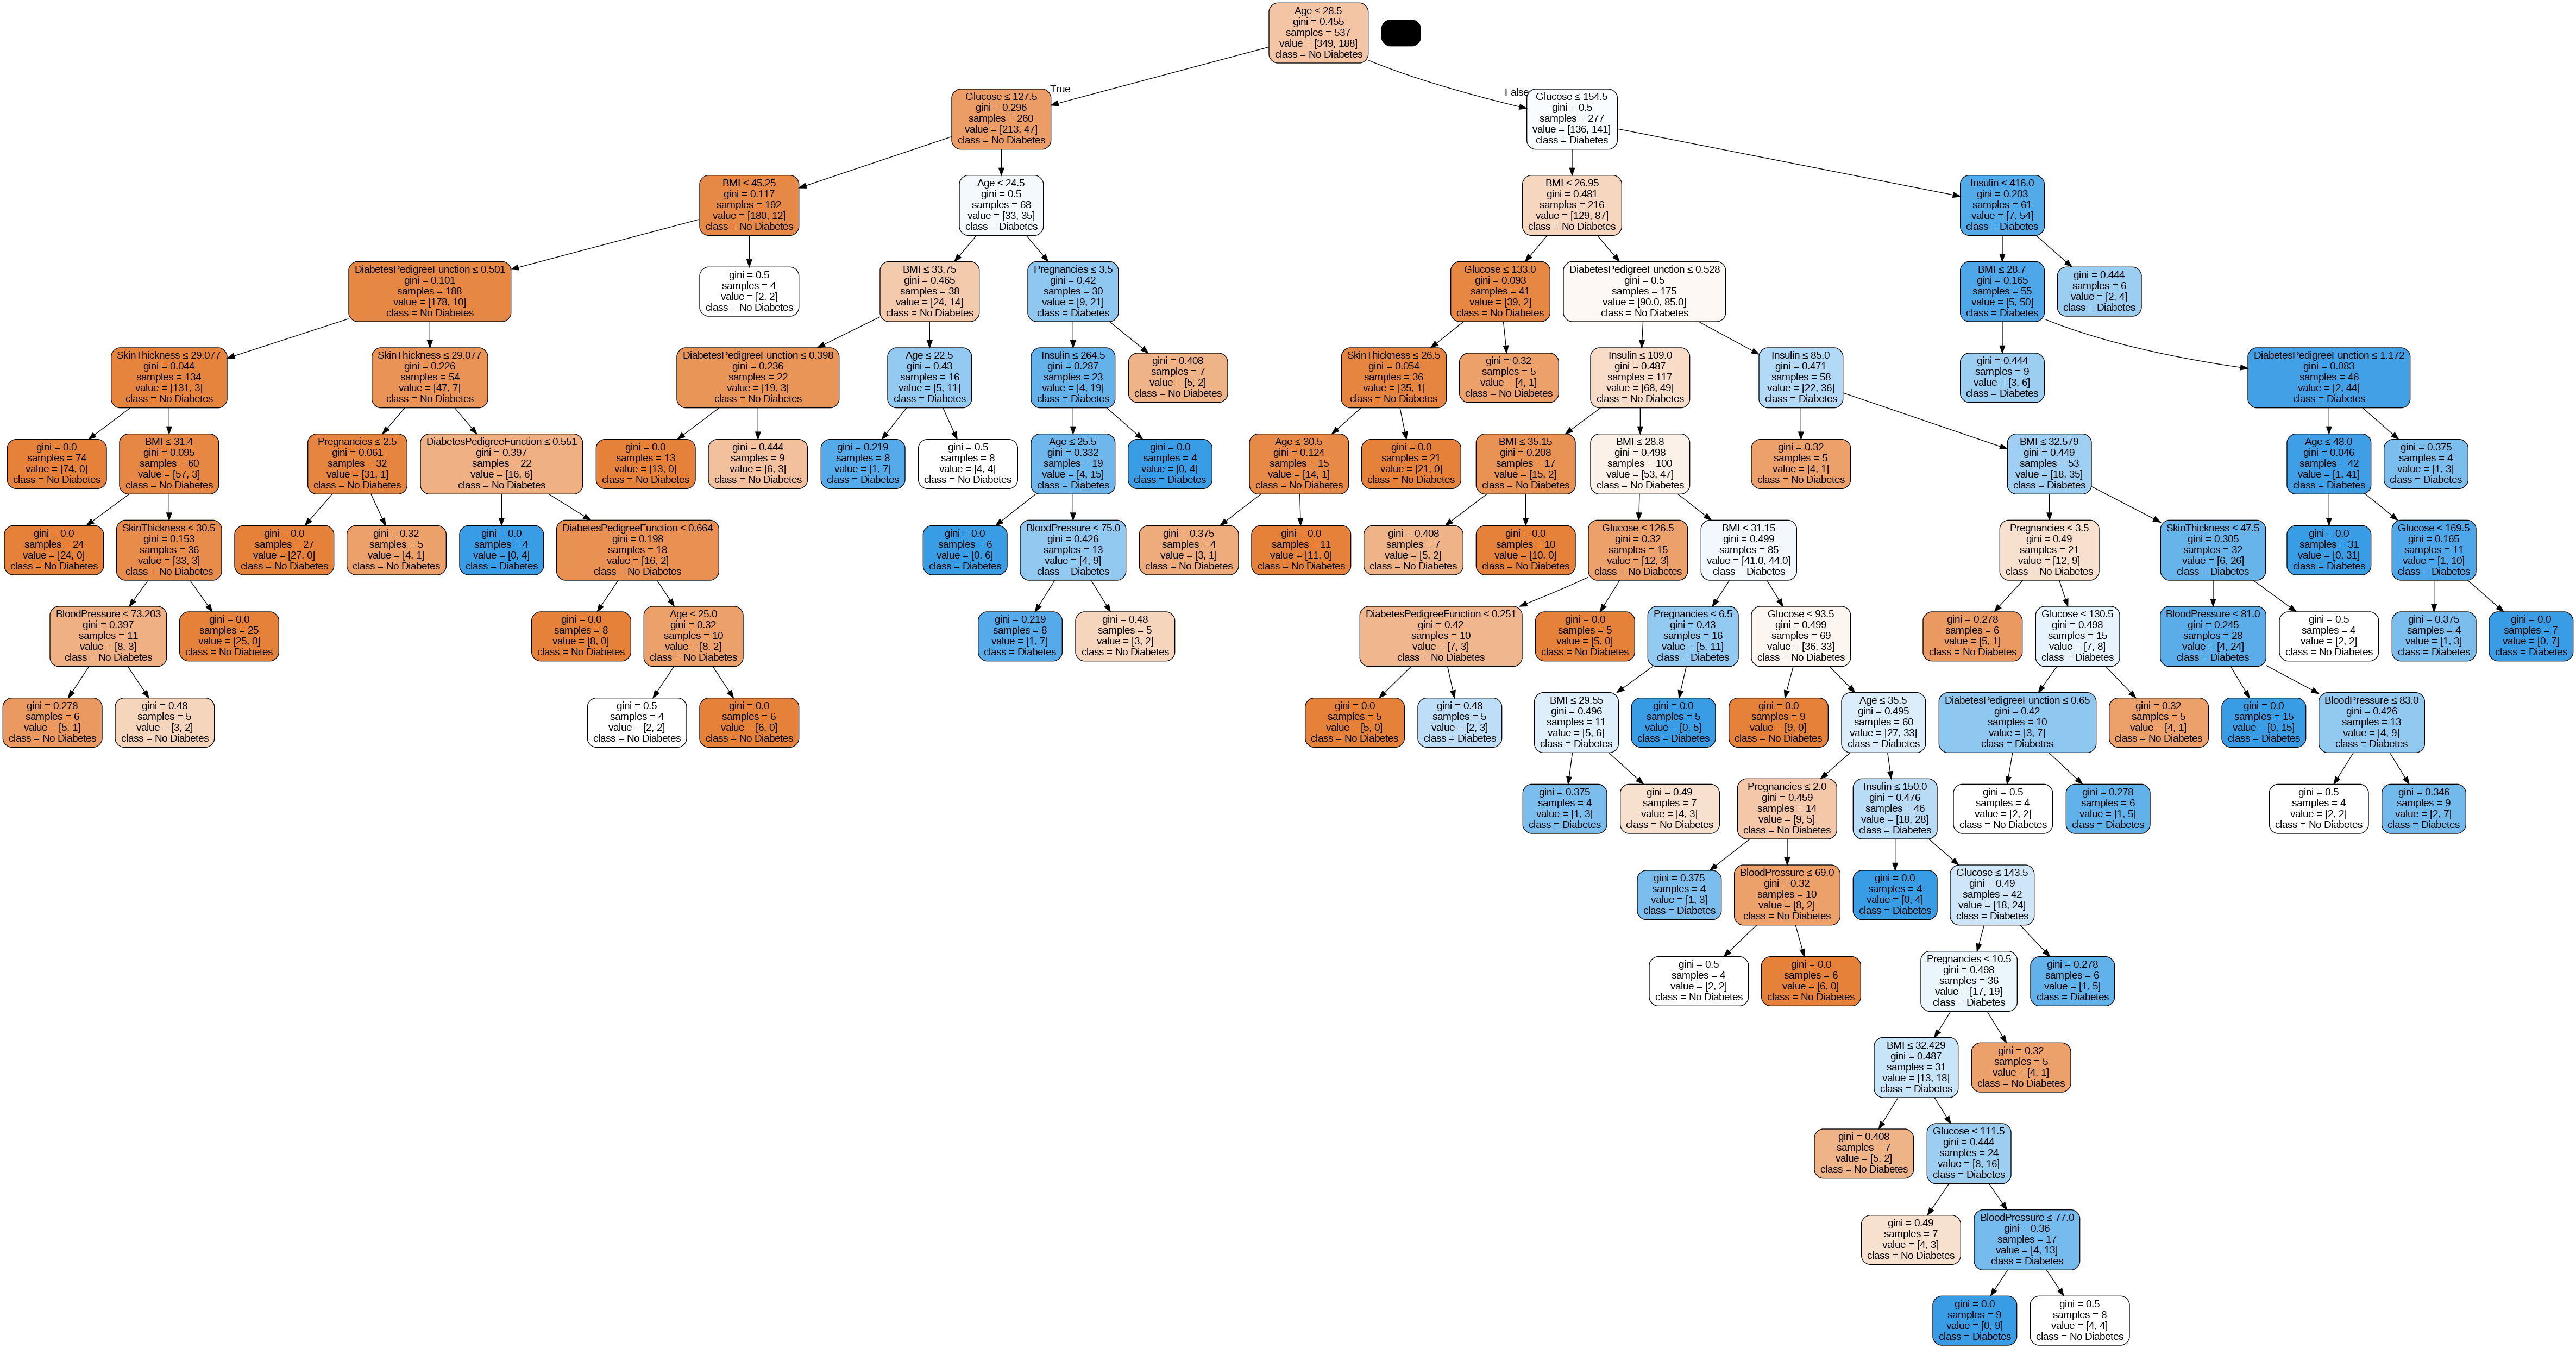

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
import graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('preprocessed_data_with_outcome.csv')

# Split the data into features and target variable
X = df.drop(columns='Outcome')
y = df['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],             # Split criterion
    'max_depth': [None, 5, 10, 20],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']        # Number of features to consider for best split
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Fit the Decision Tree model with the best parameters
best_tree = grid_search.best_estimator_

# Make predictions on the test data
y_pred_dt = best_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

# Export the optimized decision tree as a DOT file
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True, rounded=True, special_characters=True
)

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree
Image(graph.create_png())



In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data_with_outcome.csv')  # Adjust the filename if needed

# Assuming the last column is the target variable (e.g., diabetes outcome)
X = preprocessed_data.iloc[:, :-1]  # Features
y = preprocessed_data.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Fit the KNN model with the best parameters
best_knn = grid_search.best_estimator_

# Make predictions on the test data
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[76 23]
 [19 36]]


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data_with_outcome.csv')  # Adjust the filename if needed

# Assuming the last column is the target variable (e.g., diabetes outcome)
X = preprocessed_data.iloc[:, :-1]  # Features
y = preprocessed_data.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets without stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[82 17]
 [21 34]]


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Load your preprocessed data
preprocessed_data = pd.read_csv('preprocessed_data_with_outcome.csv')  # Adjust the filename if needed

# Assuming the last column is the target variable (e.g., diabetes outcome)
X = preprocessed_data.iloc[:, :-1]  # Features
y = preprocessed_data.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),          # Number of trees (randomly sampled between 100 and 300)
    'max_depth': randint(10, 30),               # Maximum depth of the tree
    'min_samples_split': randint(2, 10),        # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 4),          # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_scaled, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

# Fit the Random Forest model with the best parameters
best_rf = random_search.best_estimator_

# Make predictions on the test data
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance
importances = best_rf.feature_importances_
print("Feature Importances:")
for i, v in enumerate(importances):
    print(f'Feature {i}: {v:.4f}')


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 152}
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[79 20]
 [18 37]]
Feature Importances:
Feature 0: 0.0650
Feature 1: 0.2987
Feature 2: 0.0681
Feature 3: 0.0644
Feature 4: 0.0831
Feature 5: 0.1727
Feature 6: 0.0980
Feature 7: 0.1501


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_data_with_outcome.csv')

# Load the original dataset to get the 'Outcome' column
original = pd.read_csv('diabetes.csv')
df['Outcome'] = original['Outcome']  # Add back the target column

# Split features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Naive Bayes assumes Gaussian distribution)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[78 21]
 [18 37]]
